# Modélisation et Évaluation

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

## Dataset Iris

In [13]:
# Chargement des données
iris_df = pd.read_csv("iris.csv")
print(iris_df.head())



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [14]:
# Séparation des variables
# Créer un df Y avec seulement la colonne variety, car c'est ce qu'on veut prédire
y = iris_df['variety']
# Créer un df X avec toutes les colonnes sauf variety, pour pouvoir la prédire grâce à ces variables
X = iris_df.drop(labels='variety', axis=1)

#sépare les données en deux groupes :
#Entraînement (80%) : pour que le modèle apprenne.
#Test (20%) : pour évaluer s’il a bien appris.
#random_state=42 pour le hasard, sinon on aurait toujours le même découpage ("The Hitchhiker's Guide to the Galaxy" de Douglas Adams)
train_X_iris, test_X_iris, train_y_iris, test_y_iris = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Dataset Titanic

In [15]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
from sklearn.impute import SimpleImputer

# Création des nouvelles colonnes
titanic_df['FamilyNb'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Alone'] = (titanic_df['FamilyNb'] == 0)

# transformes les colonnes Sex et Embarked (qui sont catégorielles) en variables numériques binaires
sex_df = pd.get_dummies(titanic_df['Sex'], prefix='sex', drop_first=True) #drop_first pour éviter de créer deux colonnes
embarked_df = pd.get_dummies(titanic_df['Embarked'], prefix='embarked', dummy_na=True) # Créer une colonne par catégorie
titanic_df = pd.concat([titanic_df, embarked_df, sex_df], axis=1)

# Suppression des colonnes non utilisées
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin',
'SibSp', 'Parch', 'Sex', 'Embarked'], axis=1, inplace=True) # inplace remplace le df original

# Séparation train-test
y = titanic_df['Survived']
X = titanic_df.drop(['Survived'], axis=1)
train_X_titanic, test_X_titanic, train_y_titanic, test_y_titanic = (train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42))

# Imputation des données manquantes
col_names = train_X_titanic.columns
titanic_imputer = SimpleImputer(strategy='mean')
titanic_imputer.fit(train_X_titanic)
train_X_titanic = titanic_imputer.transform(train_X_titanic)
test_X_titanic = titanic_imputer.transform(test_X_titanic)

# /!\ : En raison du passage par Scikit, les datasets sont maintenant des numpy.array et non des DataFrame Pandas !
# Il faut recréer les DataFrame pour garder les noms des colonnes
train_X_titanic = pd.DataFrame(data=train_X_titanic, columns=col_names)
test_X_titanic = pd.DataFrame(data=test_X_titanic, columns=col_names)

In [17]:
titanic_df.head()

,Survived,Pclass,Age,Fare,FamilyNb,Alone,embarked_C,embarked_Q,embarked_S,embarked_nan,sex_male
0,0,3,34.5,7.8292,0,True,False,True,False,False,True
1,1,3,47.0,7.0000,1,False,False,False,True,False,False
2,0,2,62.0,9.6875,0,True,False,True,False,False,True
3,0,3,27.0,8.6625,0,True,False,False,True,False,True
4,1,3,22.0,12.2875,2,False,False,False,True,False,False


## Dataset Boston

In [18]:
boston_df = pd.read_csv("boston.csv")
boston_df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
y = boston_df['medv']
X = boston_df.drop(labels='medv', axis=1)
train_X_boston, test_X_boston, train_y_boston, test_y_boston =  train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Création des modèles
## modèle en Scikit-learn

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(train_X_iris, train_y_iris)
pred_y_iris = tree_classifier.predict(test_X_iris)

## Évaluation du modèle en Scikit-learn

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y_iris, pred_y_iris)

1.0

## Validation croisée

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_validate(tree_classifier, train_X_iris,
train_y_iris, cv=5, scoring=['accuracy', 'f1_macro'])

In [27]:
print(scores['test_accuracy'])

[0.95833333 1.         0.83333333 0.95833333 0.91666667]


## Sauvegarde et chargement d’un modèle

In [35]:
import pickle
filename = 'iris_pickle.bak'
pickle.dump(tree_classifier, open(filename, 'wb'))
# Pour récupérer le modèle dans un autre code Python, il suffit de le charger à partir du fichier :
# old_model = pickle.load(open(filename, 'rb'))


# Fine-Tuning
## Optimisation des hyperparamètres
Les principales stratégies sont :
1. la recherche dans une grille (**grid search**) : pour chaque hyperparamètre, un nombre donné de valeurs est fourni, et la recherche essaiera toutes les combinaisons possibles ;
2. la recherche aléatoire (**random search**) : seul un sous-ensemble des combinaisons possibles sera testé. La recherche aléatoire peut prendre ses valeurs parmi des listes fournies ou en les sélectionnant sur des intervalles continus ;
3. la recherche par gradient (**gradient-based optimization**) : en fonction des résultats obtenus sur différents ensembles, la recherche sera guidée dans le sens du gradient vers l’optimisation de la métrique choisie.

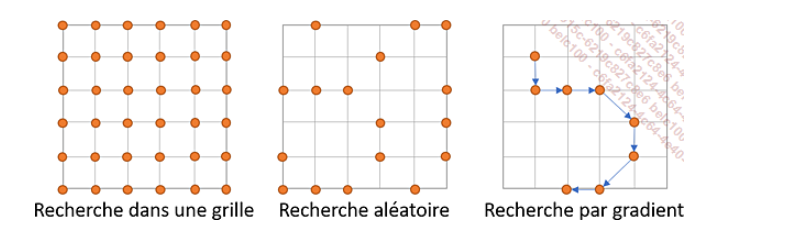